In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(100, 50)  # 100 входов, 50 нейронов
        self.fc2 = nn.Linear(50, 10)   # 50 входов, 10 нейронов

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = MyModel()

In [ ]:
weights = model.fc1.weight.data  
print('fc1:', weights.shape)
weights = model.fc2.weight.data  
print('fc2:', weights.shape)
print(weights[0].shape)

fc1: torch.Size([50, 100])
fc2: torch.Size([10, 50])
torch.Size([50])


In [15]:
model.fc2.weight.view(model.fc2.weight.size(0), -1).shape

torch.Size([10, 50])

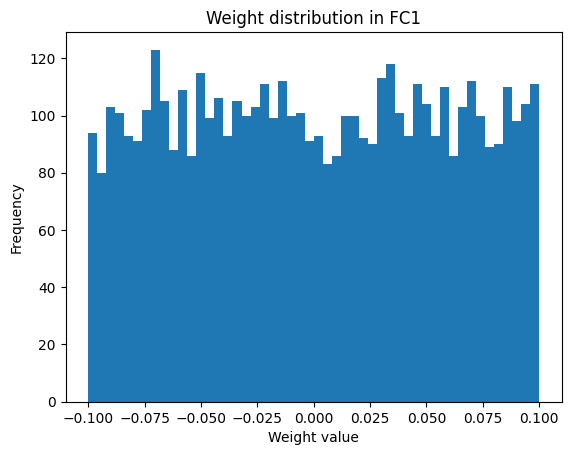

In [9]:
import matplotlib.pyplot as plt

def plot_layer_weights(layer_weights, layer_name):
    plt.hist(layer_weights.flatten().cpu().detach().numpy(), bins=50)
    plt.title(f'Weight distribution in {layer_name}')
    plt.xlabel('Weight value')
    plt.ylabel('Frequency')
    plt.show()

# Пример для первого полносвязного слоя модели (fc1)
weights = model.fc1.weight.data  # Берём веса слоя
plot_layer_weights(weights, "FC1")

In [ ]:
def count_near_zero_weights(layer_weights, epsilon=1e-5):
    near_zero = torch.abs(layer_weights) < epsilon
    return torch.sum(near_zero).item()

neuron_weights = model.fc1.weight.data
print(f"Near-zero weights in neuron: {count_near_zero_weights(neuron_weights)}")

Near-zero weights in neuron: 1


In [8]:
def find_dead_neurons(layer, epsilon=1e-5):
    dead_neurons = []
    for i, neuron_weights in enumerate(layer.weight.data):
        if torch.all(torch.abs(neuron_weights) < epsilon):
            dead_neurons.append(i)
    return dead_neurons

dead_neurons_fc1 = find_dead_neurons(model.fc1)
print(f"Dead neurons in FC1: {dead_neurons_fc1}")

Dead neurons in FC1: []


tensor([[-0.0967, -0.0128, -0.0047,  ..., -0.0982,  0.0148,  0.0944],
        [ 0.0225, -0.0256,  0.0516,  ..., -0.0599, -0.0770, -0.0221],
        [-0.0585,  0.0046,  0.0159,  ..., -0.0711,  0.0802,  0.0501],
        ...,
        [-0.0914, -0.0423, -0.0204,  ..., -0.0324, -0.0652, -0.0380],
        [-0.0974, -0.0210,  0.0125,  ...,  0.0018, -0.0821,  0.0358],
        [ 0.0593, -0.0411, -0.0239,  ..., -0.0519,  0.0925,  0.0724]])